# Dimensionality Reduction
    Principal Component Analysis (PCA) for unsupervised dimensionality reduction by projecting the data in the direction of largest variance.
     
    PCA is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. 
    
    This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

### How do we do PCA?
    1.Standardize the original d-dimensional dataset.
    2.Construct the covariance matrix.
    3.Decompose the covariance matrix into its eigenvectors and eigenvalues.
    4.Sort the eigenvalues by decreasing order to rank the correspondingeigenvectors.
    5.Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤d ).
    6.Construct a projection matrix W from the "top" k eigenvectors.
    7.Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

In [2]:
#PCA
# We will now be importing some required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

**Wine** dataset from UCI ML Repository
- Every row is a wine
- Every column is an attribute about a wine
- Dependent variable Customer_Segmentdenotes the type of customer that prefers that particular wine.

If we run Logistic Regression on this dataset, using all the independent attributes, we will be able to predict the customer segment.However, we will be unable to visualize our wine dataset as we have too many attributes. So, we will run Logistic Regression on the PCA transformed data, and then visualize the results. 

In [21]:
#Loading the dataset
dataset = pd.read_csv('wine.csv')

#display (dataset.head(5))
#display (dataset.tail(5))
#dataset.shape

In [22]:
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

In [23]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### First we want to including all principle components by specifying None


In [25]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)

X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)

components_variance = pcaObj.explained_variance_ratio_

In [26]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

In [28]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
components_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

## The components_variancevector explains the proportion of variance in the dataset 
## explained by each of the principal components. After examining that we may want to include only two principal components. Make sure to restart the kernel

In [36]:
dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
#Applying PCA
pcaObj = PCA(n_components=2)

X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)

components_variance = pcaObj.explained_variance_ratio_

In [38]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

In [40]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [41]:
components_variance

array([0.36884109, 0.19318394])

### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


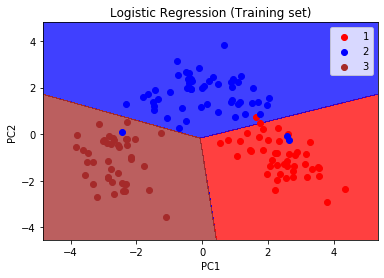

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue','brown'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

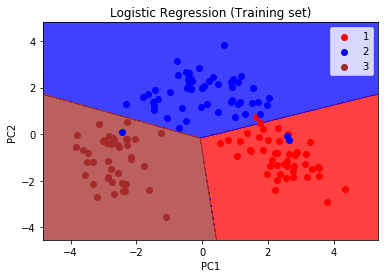

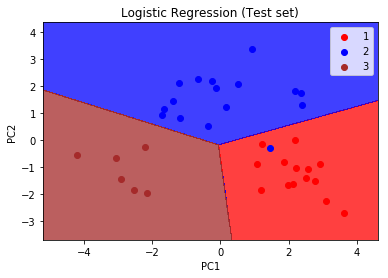

In [1]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'brown')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'brown'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()